<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

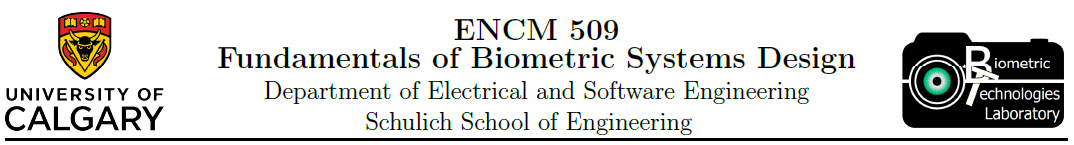

## Lab 3:

* Team member - Abid Al Labib 
    - UCID: 30070079
* Team member - Madhu Selvaraj
    - UCID: 30061979
    

## Introduction:
In this lab we take a look at Gaussian Mixture Model and how changing the number of training components can affect the results of a Gaussian Mixture model.We also applied knowledge learned from our lectures to find the FAR and FRR using hypothesis testing.

For this lab we used the signatures collected in lab 2.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

## Exercise 1

In [11]:
#loading the data

# data folder:
base_dir = './sig_vals/'

# "genuine" and "impostor" sub-directories
dir_authentic = base_dir + 'g'
dir_impostor = base_dir + 'i'
dir_words = base_dir + 'w'
# amount of signatures to be loaded
total_signatures = 30
numForgedSigs = 30
# lists to store the loaded signatures
auth_lst = []
imp_lst = []
words_lst = []

# loading 'total_signatures' signatures from both "authentic" and "impostor" 
for i in range(total_signatures):
    # columns: [X, Y, Pressure, Time]
    csv_auth = pd.read_csv(dir_authentic + '%d.csv' % (i+1))
    csv_imp = pd.read_csv(dir_impostor + '%d.csv' % (i+1))
    csv_words = pd.read_csv(dir_words + '%d.csv' % (i+1))

    auth_lst.append(csv_auth.values) #ndarray
    imp_lst.append(csv_imp.values)
    words_lst.append(csv_words.values)


In [12]:
# number of signature samples to use for training the models
NUMTRAININGPATTERNS = [20,25]

# number of Gaussian mixture components in the GMM
NUMGCOMPONENTS = [20,60]


The number of signatures for training is the first 20 signatures from the set,
and the number of Gaussian mixture components is 20
Average of authentic scores: -15.4152
Average of forgery scores: -30.3350
Deviation of authentic scores: 0.5916
Deviation of forgery scores: 16.3162


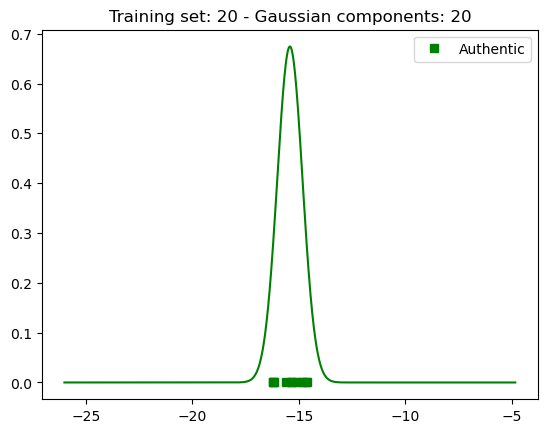

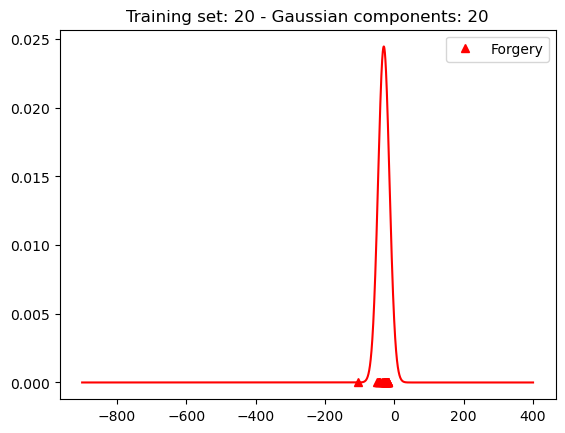

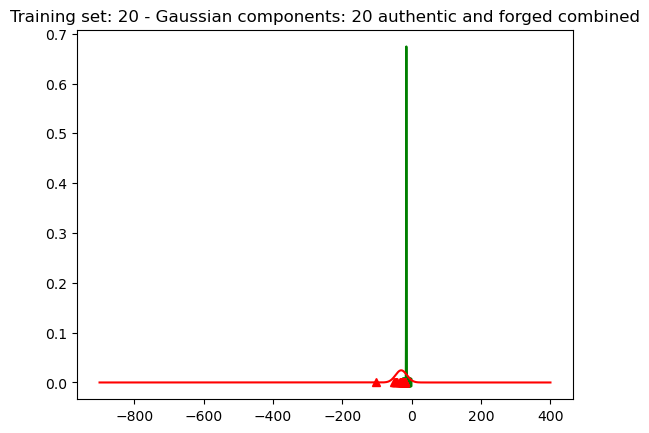

The number of signatures for training is the first 20 signatures from the set,
and the number of Gaussian mixture components is 60
Average of authentic scores: -15.6127
Average of forgery scores: -141.7790
Deviation of authentic scores: 1.0096
Deviation of forgery scores: 225.8744


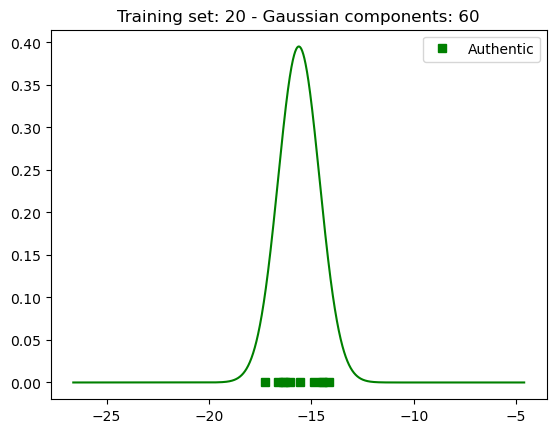

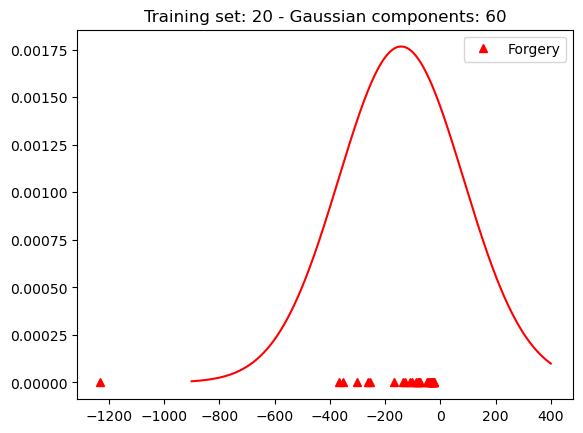

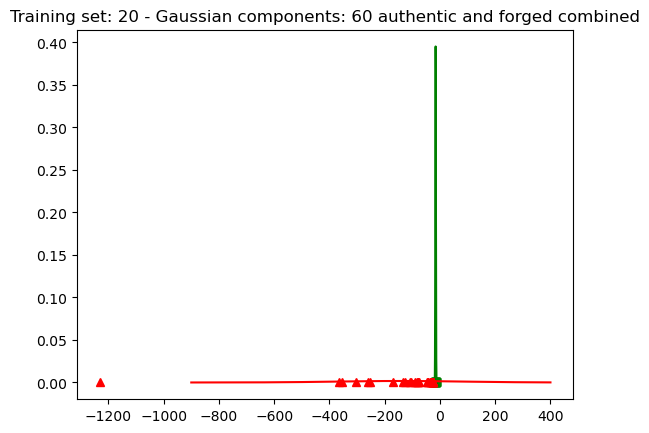

The number of signatures for training is the first 25 signatures from the set,
and the number of Gaussian mixture components is 20
Average of authentic scores: -14.9808
Average of forgery scores: -47.3430
Deviation of authentic scores: 0.3797
Deviation of forgery scores: 45.9521


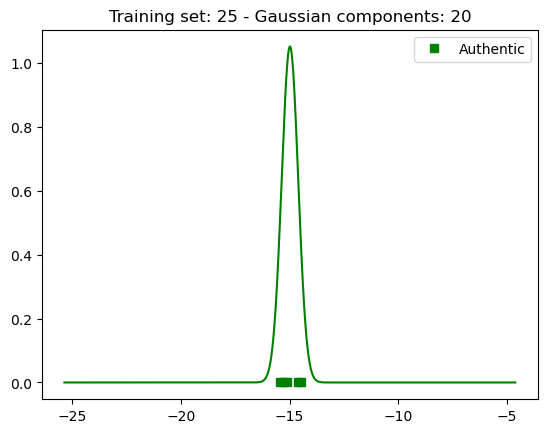

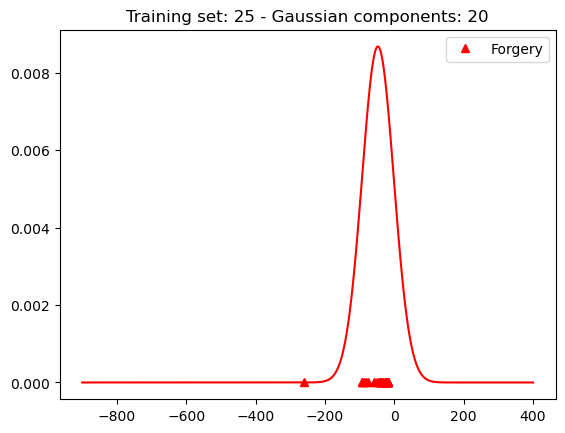

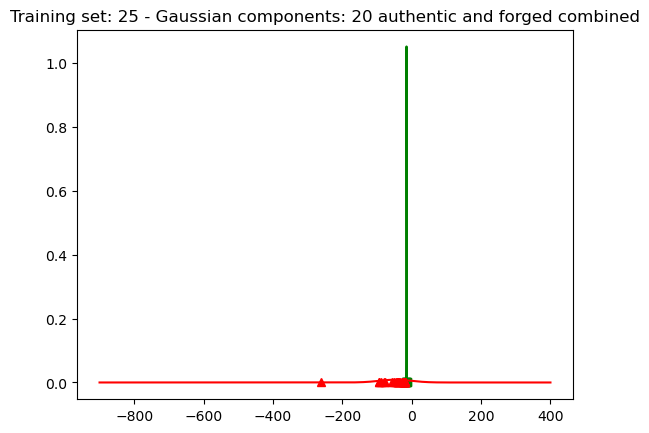

The number of signatures for training is the first 25 signatures from the set,
and the number of Gaussian mixture components is 60
Average of authentic scores: -14.8625
Average of forgery scores: -114.7265
Deviation of authentic scores: 0.7453
Deviation of forgery scores: 142.7246


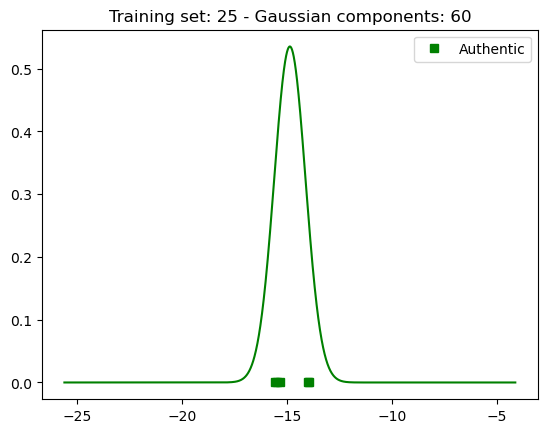

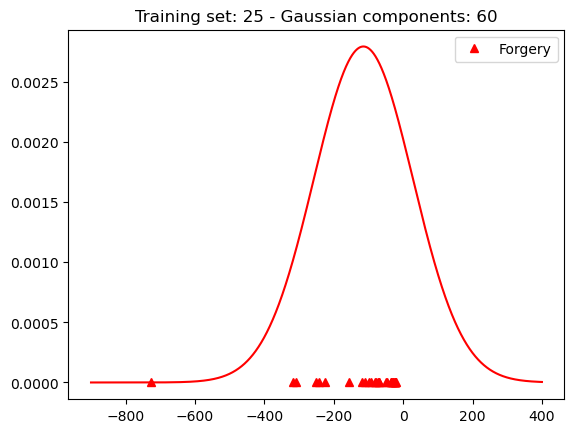

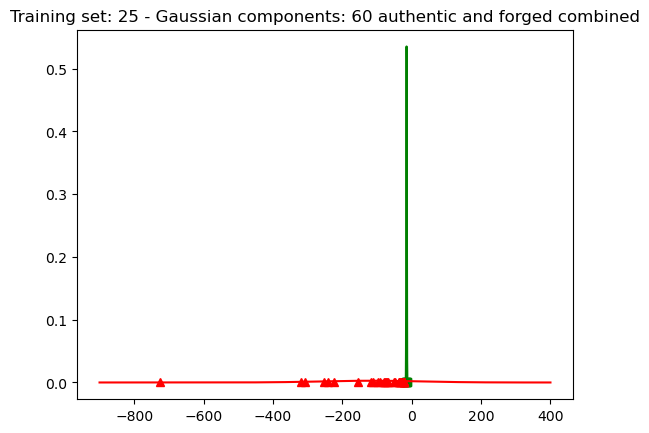

In [13]:
gmmList = []
g_mean_list = []
for ntp in NUMTRAININGPATTERNS:
    for ngc in NUMGCOMPONENTS:
        print('The number of signatures for training is the first %d signatures from the set,' % (ntp ))
        print('and the number of Gaussian mixture components is %d' % (ngc))
        
        train_set = np.reshape(auth_lst[0], (-1,4))
        for i in range(1,ntp):
            sample = np.reshape(auth_lst[i], (-1,4)) #getting the next sample from auth_list
            train_set = np.concatenate((train_set, sample), axis=0) #concatenating the samples
        
        gmm = GaussianMixture(n_components=ngc).fit(train_set)
        #gmmList.append(gmm)


        # to store all the scores calculated
        aScores = [] 
        fScores = []
        #gmm = gmmList[g]

        # Testing the GaussianMixture model with remaining genuine signatures (10 in total)
        for i in range(ntp, total_signatures):
            sample =  np.reshape(auth_lst[i], (-1,4)) # taking from authentic/genuine samples

            score = gmm.score(sample) # compute the per-sample average log-likelihood of the given data
            aScores.append(score) # add the score calculated to the list aScores

        # Testing the GaussianMixture model with forged signatures (30 in total)
        for i in range(numForgedSigs):
            sample =  np.reshape(imp_lst[i], (-1,4)) # taking from the impostor samples

            score = gmm.score(sample)
            fScores.append(score)

        #calculating the mean and std
        # authentic set
        aMu = np.mean(aScores)
        aStd = np.std(aScores)

        # impostor set
        fMu = np.mean(fScores)
        fStd = np.std(fScores)

        print('Average of authentic scores: %.4f' % (aMu))
        print('Average of forgery scores: %.4f' % (fMu))

        print('Deviation of authentic scores: %.4f' % (aStd))
        print('Deviation of forgery scores: %.4f' % (fStd))


        #PDF of the genuine and imposter samples

        x = np.arange(-60, 0, 0.01) # change this range for your set

        aProb = norm.pdf(x, loc=aMu, scale=aStd)
        fProb = norm.pdf(x, loc=fMu, scale=fStd)

        # plt.plot(x, aProb, 'g')
        # plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        # plt.plot(x, fProb, 'r')
        # plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        # plt.legend()

        # plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS[g], NUMGCOMPONENTS[g]))

        #plot all param combinations....
        # plt.figure(figsize=(10,4))

        #Authentic set
        x = np.arange(aMu-aStd-10, aMu+aStd+10, 0.01)
        aProb = norm.pdf(x, loc=aMu, scale=aStd)

        # plt.subplot(1,2,1)
        plt.plot(x, aProb, 'g')
        plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        plt.legend()

        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))
        plt.show()

        # Forged (impostor) set
        x = np.arange(-900, 400, 0.01)
        fProb = norm.pdf(x, loc=fMu, scale=fStd)

        # plt.subplot(1,2,2)
        plt.plot(x, fProb, 'r')
        plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        plt.legend();
        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))
        plt.show()   
        
        x_a = np.arange(aMu-aStd-10, aMu+aStd+10, 0.01)
        x_f = np.arange(-900, 400, 0.01)
        plt.plot(x_a,aProb,'g')
        plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        plt.plot(x_f,fProb,'r')
        plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        plt.title('Training set: {} - Gaussian components: {} authentic and forged combined'.format(ntp, ngc))
        plt.show()

From the results we can see that increasing the number of components is increasing the deviation in the models for both the authentic and forged signature dataset. Furthermore when we are overlapping the authentic and forged models, we can see that the model based on the authentic signatures has a large spike compared to the model based on the forged signatures, this is due to the large difference in deviation.

## Exercise 2

The number of signatures for training is the first 20 signatures from the set,
and the number of Gaussian mixture components is 20
Average of authentic scores: -15.4491
Average of second set of forgery scores: -35.8756
Deviation of authentic scores: 0.4457
Deviation of second set of forgery scores: 22.3990


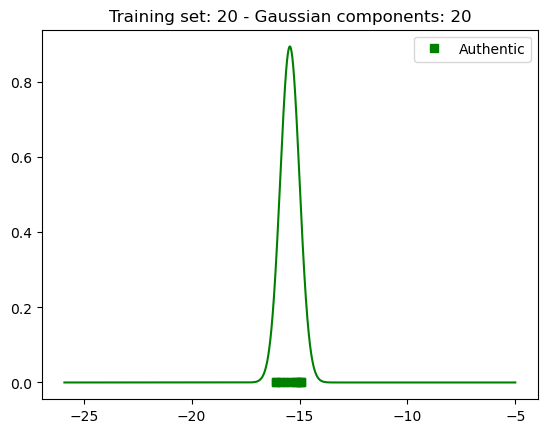

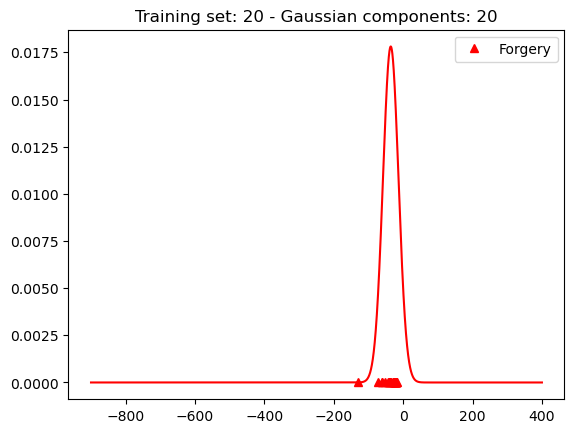

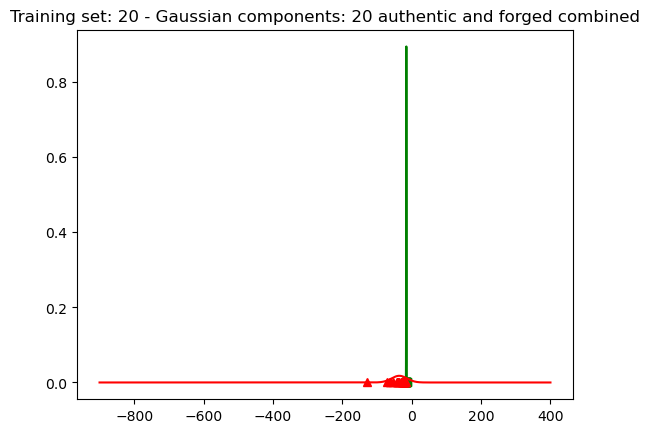

The number of signatures for training is the first 20 signatures from the set,
and the number of Gaussian mixture components is 60
Average of authentic scores: -15.6402
Average of second set of forgery scores: -69.7248
Deviation of authentic scores: 0.9754
Deviation of second set of forgery scores: 92.3860


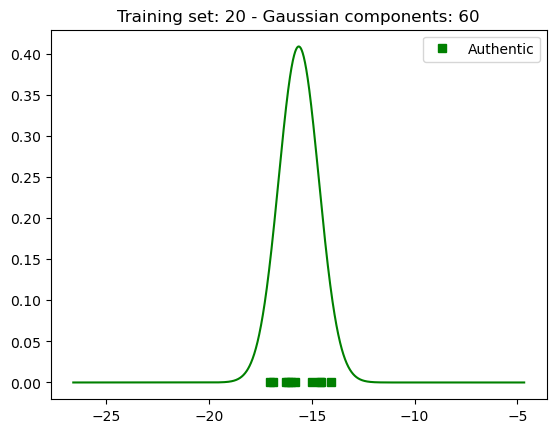

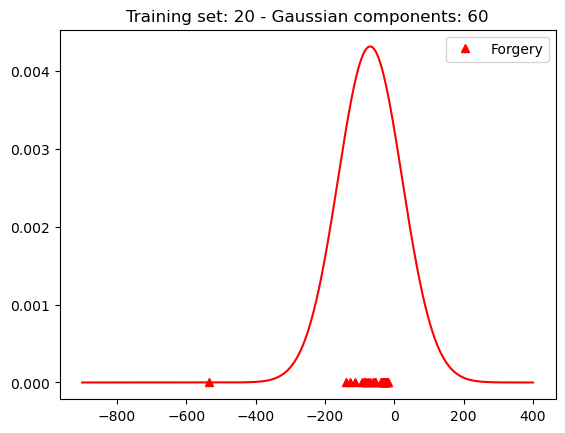

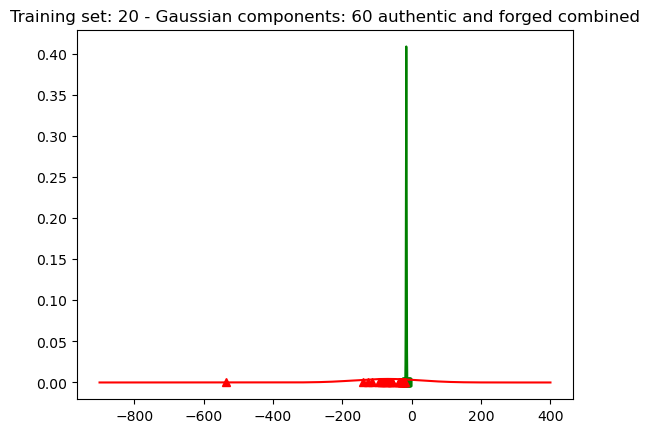

The number of signatures for training is the first 25 signatures from the set,
and the number of Gaussian mixture components is 20
Average of authentic scores: -15.0502
Average of second set of forgery scores: -35.6892
Deviation of authentic scores: 0.4748
Deviation of second set of forgery scores: 24.9182


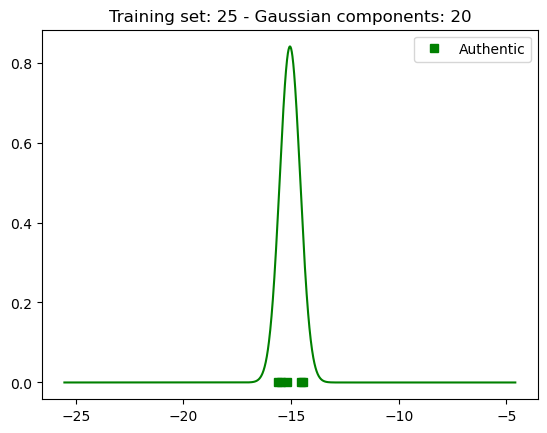

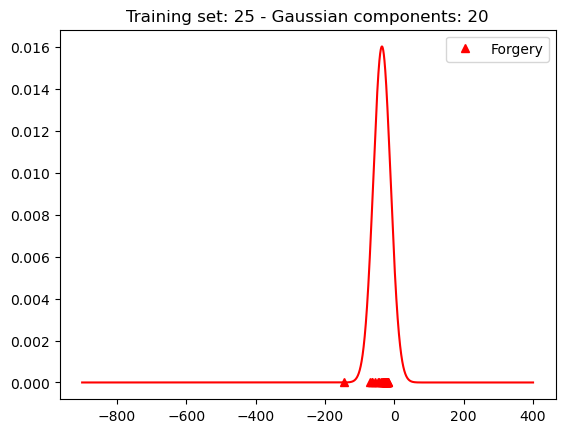

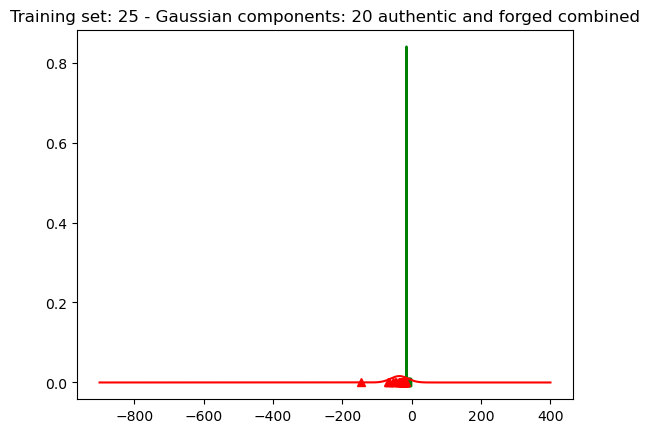

The number of signatures for training is the first 25 signatures from the set,
and the number of Gaussian mixture components is 60
Average of authentic scores: -15.0132
Average of second set of forgery scores: -69.0513
Deviation of authentic scores: 0.8644
Deviation of second set of forgery scores: 94.5976


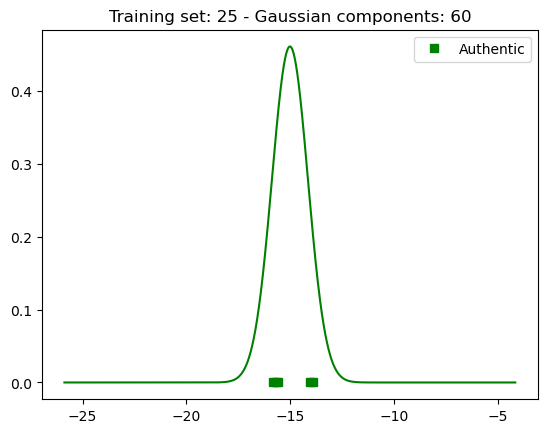

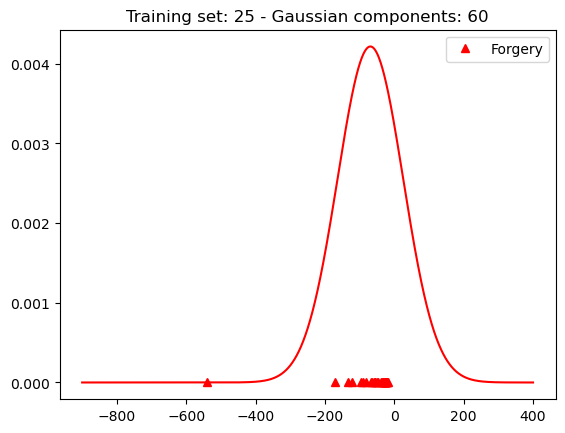

In [ ]:
gmmList = []

for ntp in NUMTRAININGPATTERNS:
    for ngc in NUMGCOMPONENTS:
        print('The number of signatures for training is the first %d signatures from the set,' % (ntp ))
        print('and the number of Gaussian mixture components is %d' % (ngc))
        
        train_set = np.reshape(auth_lst[0], (-1,4))
        for i in range(1,ntp):
            sample = np.reshape(auth_lst[i], (-1,4)) #getting the next sample from auth_list
            train_set = np.concatenate((train_set, sample), axis=0) #concatenating the samples
        
        gmm = GaussianMixture(n_components=ngc).fit(train_set)
        #gmmList.append(gmm)


        # to store all the scores calculated
        aScores = [] 
        fScores = []
        #gmm = gmmList[g]

        # Testing the GaussianMixture model with remaining genuine signatures (10 in total)
        for i in range(ntp, total_signatures):
            sample =  np.reshape(auth_lst[i], (-1,4)) # taking from authentic/genuine samples

            score = gmm.score(sample) # compute the per-sample average log-likelihood of the given data
            aScores.append(score) # add the score calculated to the list aScores

        # Testing the GaussianMixture model with forged signatures (30 in total)
        for i in range(numForgedSigs):
            sample =  np.reshape(words_lst[i], (-1,4)) # taking from the impostor samples

            score = gmm.score(sample)
            fScores.append(score)

        #calculating the mean and std
        # authentic set
        aMu = np.mean(aScores)
        aStd = np.std(aScores)

        # impostor set
        fMu = np.mean(fScores)
        fStd = np.std(fScores)

        print('Average of authentic scores: %.4f' % (aMu))
        print('Average of second set of forgery scores: %.4f' % (fMu))

        print('Deviation of authentic scores: %.4f' % (aStd))
        print('Deviation of second set of forgery scores: %.4f' % (fStd))


        #PDF of the genuine and imposter samples

        x = np.arange(-60, 0, 0.01) # change this range for your set

        aProb = norm.pdf(x, loc=aMu, scale=aStd)
        fProb = norm.pdf(x, loc=fMu, scale=fStd)

        # plt.plot(x, aProb, 'g')
        # plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        # plt.plot(x, fProb, 'r')
        # plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        # plt.legend()

        # plt.title('Training set: {} - Gaussian components: {}'.format(NUMTRAININGPATTERNS[g], NUMGCOMPONENTS[g]))

        #plot all param combinations....
        # plt.figure(figsize=(10,4))

        #Authentic set
        x = np.arange(aMu-aStd-10, aMu+aStd+10, 0.01)
        aProb = norm.pdf(x, loc=aMu, scale=aStd)

        # plt.subplot(1,2,1)
        plt.plot(x, aProb, 'g')
        plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        plt.legend()

        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))
        plt.show()

        # Forged (impostor) set
        x = np.arange(-900, 400, 0.01)
        fProb = norm.pdf(x, loc=fMu, scale=fStd)

        # plt.subplot(1,2,2)
        plt.plot(x, fProb, 'r')
        plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        plt.legend();
        plt.title('Training set: {} - Gaussian components: {}'.format(ntp, ngc))
        plt.show() 
        
        x_a = np.arange(aMu-aStd-10, aMu+aStd+10, 0.01)
        x_f = np.arange(-900, 400, 0.01)
        plt.plot(x_a,aProb,'g')
        plt.plot(aScores, np.zeros(len(aScores)), 'gs', lw=2, label='Authentic')
        plt.plot(x_f,fProb,'r')
        plt.plot(fScores, np.zeros(len(fScores)), 'r^', lw=2, label='Forgery')
        plt.title('Training set: {} - Gaussian components: {} authentic and forged combined'.format(ntp, ngc))
        plt.show()

Very similar to exercise 2 we can see that increasing the number of components is increasing the deviation in the models for both the authentic and second set of forged signature dataset. Furthermore when we are overlapping the authentic and second set of forged models, we can see that the model based on the authentic signatures has a large spike compared to the model based on the second set of forged signatures, this is due to the large difference in deviation.

## Exercise 3

In [ ]:
g_mean_list = []
g_std_list = []
for ntp in NUMTRAININGPATTERNS:
    for ngc in NUMGCOMPONENTS:
#         print('The number of signatures for training is the first %d signatures from the set,' % (ntp ))
#         print('and the number of Gaussian mixture components is %d' % (ngc))
        
        train_set = np.reshape(auth_lst[0], (-1,4))
        for i in range(1,ntp):
            sample = np.reshape(auth_lst[i], (-1,4)) #getting the next sample from auth_list
            train_set = np.concatenate((train_set, sample), axis=0) #concatenating the samples
        
        gmm = GaussianMixture(n_components=ngc).fit(train_set)
        #gmmList.append(gmm)


        # to store all the scores calculated
        aScores = [] 

        #gmm = gmmList[g]

        # Testing the GaussianMixture model with remaining genuine signatures (10 in total)
        for i in range(ntp, total_signatures):
            sample =  np.reshape(auth_lst[i], (-1,4)) # taking from authentic/genuine samples

            score = gmm.score(sample) # compute the per-sample average log-likelihood of the given data
            aScores.append(score) # add the score calculated to the list aScores

        #calculating the mean and std
        # authentic set
        aMu = np.mean(aScores)
        aStd = np.std(aScores)
        
        g_mean_list.append(aMu)
        g_std_list.append(aStd)
        
hypo_mean = np.mean(g_mean_list)
hypo_std = np.mean(g_std_list)

print(f"h_mean: {hypo_mean}, h_std: {hypo_std}")